# Analysis of the Noita Eye Cipher

 In this notebook, I will be doing some analysis on the eye ciphers found in the game Noita. This is a puzzle that has not been solved in over 2 years of work. More background information can be found [here](https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#). 
 
 Here, my aim is to do some frequency analysis on the cipher with the hope that it can assist in the characterization of the cipher, and also allow other to use this code to easily 

### Citations:

Cipher codes pulled from here: https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#

More resources for the cipher: https://docs.google.com/spreadsheets/d/1Aih_3v9BMbVI-MQQgWP51HTTplgRwXi2jRKYgyhPMao/edit#gid=0


In [1]:
# Imports (Running )
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from eyecipher.cipher_message import CipherMessage

## Toggles

In [2]:
# Number of random samples to use for comparison
NUM_RANDOM_SAMPLES = 1000
# Boolean (True or False) for if certain results should be wrtitten to the outputs folder. This includes the trigram report 
WRITE_REPORT = True
# File name and location for reports to be written to
folder_name = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
output_dir = os.path.join("output", folder_name)
# File path to folder containing text files labele "east1.txt", "west1.txt".. ect to be read in
base_dir = os.path.join("cipher_data", "interleaved")

In [7]:
if WRITE_REPORT:
    os.makedirs(output_dir, exist_ok=True)

# 1 Setup Data
### 1.1 Read in the ciphers

In [8]:
# Define cipher file locations
east1 =  os.path.join(base_dir, "east1")
west1 =  os.path.join(base_dir, "west1")
east2 =  os.path.join(base_dir, "east2")
west2 =  os.path.join(base_dir, "west2")
east3 =  os.path.join(base_dir, "east3")
west3 =  os.path.join(base_dir, "west3")
east4 =  os.path.join(base_dir, "east4")
west4 =  os.path.join(base_dir, "west4")
east5 =  os.path.join(base_dir, "east5")

east1_message = CipherMessage(file_name = east1, name = "East 1")
west1_message = CipherMessage(file_name = west1, name = "West 1")
east2_message = CipherMessage(file_name = east2, name = "East 2")
west2_message = CipherMessage(file_name = west2, name = "West 2")
east3_message = CipherMessage(file_name = east3, name = "East 3")
west3_message = CipherMessage(file_name = west3, name = "West 3")
east4_message = CipherMessage(file_name = east4, name = "East 4")
west4_message = CipherMessage(file_name = west4, name = "West 4")
east5_message = CipherMessage(file_name = east5, name = "East 5")

combined_message = east1_message + west1_message + east2_message + \
                   west2_message + east3_message + west3_message + \
                   east4_message + west4_message + east5_message

all_messages = [east1_message,  west1_message, east2_message, \
                west2_message, east3_message, west3_message, \
                east4_message, west4_message, east5_message]

### 1.2 Set up random data for analysis

In [9]:
shuffled_trigrams = []
shuffled_eyes = []
random_eyes = []

unique_trigrams_random = 0
unique_trigrams_shuffled = 0

for i in range(NUM_RANDOM_SAMPLES):
    s_eye_data = combined_message.shuffle_eyes()
    shuffled_eyes.append(s_eye_data)
    unique_trigrams_shuffled += s_eye_data.num_unique_trigrams

    s_tri_data = combined_message.shuffle_trigrams()
    shuffled_trigrams.append(s_tri_data)
    
    r_eye_data = combined_message.random_eyes()
    random_eyes.append(r_eye_data)
    unique_trigrams_random += r_eye_data.num_unique_trigrams

unique_trigrams_random = unique_trigrams_random / NUM_RANDOM_SAMPLES
unique_trigrams_shuffled = unique_trigrams_shuffled / NUM_RANDOM_SAMPLES

all_eyes_shuffled = shuffled_eyes[0]
for message in shuffled_eyes[1:]:
    all_eyes_shuffled += message

all_trigrams_shuffled = shuffled_trigrams[0]
for message in shuffled_trigrams[1:]:
    all_trigrams_shuffled += message

all_random_eyes = random_eyes[0]
for message in random_eyes[1:]:
    all_random_eyes += message

### TODO: 1.3 Set up known encoded mesages here

# 2 Character Frequency Analysis

To begin, let's analyze the distribution of different eye glyphs within the message

In the encoding I am using:

- 0: ![Center](images/center.png) Center
- 1: ![Up](images/up.png) Up
- 2: ![Right](images/right.png) Right
- 3: ![Down](images/down.png) Down
- 4: ![Left](images/left.png) Left

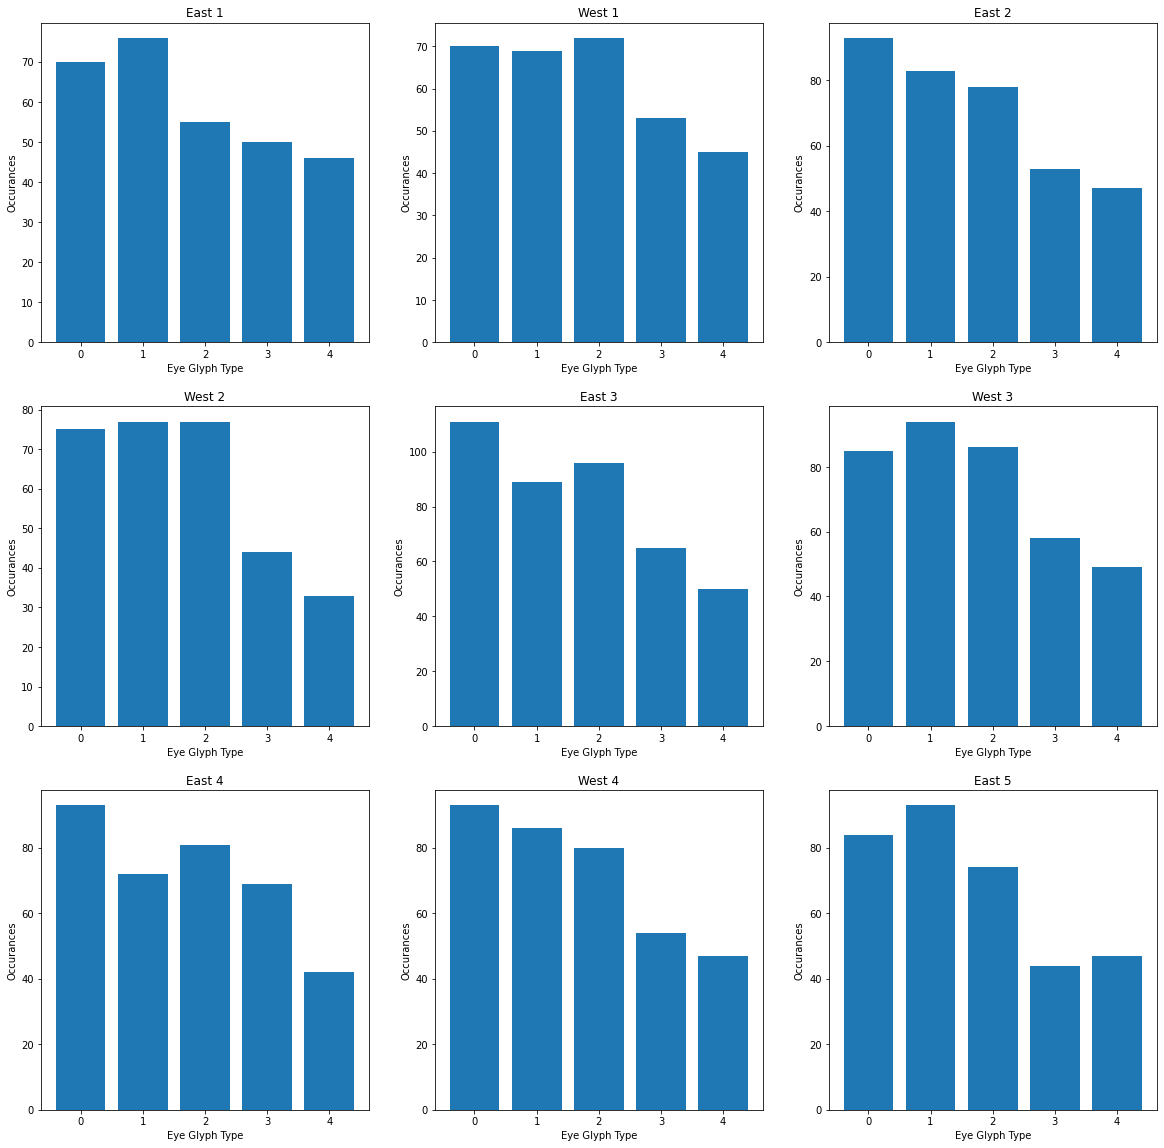

In [13]:
plt.figure(figsize=(20,20))

subplot_num = 1
for message in all_messages:
    # Grab counter data
    eyes = Counter(message.eyes)
    eyes = sorted(eyes.items())
    keys = [i[0] for i in eyes]
    vals = [i[1] for i in eyes]

    # Plot
    plt.subplot(3,3,subplot_num)
    plt.bar(keys, vals)
    plt.title(message.name)
    plt.xlabel("Eye Glyph Type")
    plt.ylabel("Occurances")
    
    subplot_num += 1

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"eye_glyph_distribution.png"))

plt.show()


Let's compare the aggragate of all of the glyphs with a random distribution of eyes

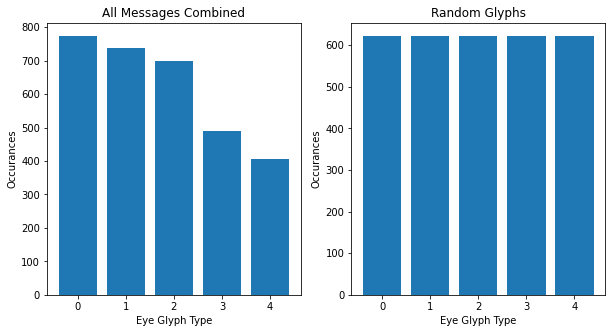

In [7]:
plt.figure(figsize=(10,5))
eyes = Counter(combined_message.eyes)
eyes = sorted(eyes.items())
keys = [i[0] for i in eyes]
vals = [i[1] for i in eyes]

# Plot
plt.subplot(1,2,1)
plt.bar(keys, vals)
plt.title("All Messages Combined")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

rand_eyes = Counter(all_random_eyes.eyes)
rand_eyes = sorted(rand_eyes.items())
rand_keys = [i[0] for i in rand_eyes]
rand_vals = [i[1]/NUM_RANDOM_SAMPLES for i in rand_eyes]

# Plot
plt.subplot(1,2,2)
plt.bar(rand_keys, rand_vals)
plt.title("Random Glyphs")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"eye_glyph_distribution_vs_random.png"))

plt.show()

# 3 Unique Trigram Analysis

Since the only common factor between all messages is 3, it is commonly agreed upon that the message is to be read as sets of trigrams (i.e. pairs of three characters grouped together).

Let's dig into the number of trigram patterns that appear, their frequencies, and some other information about them.


In [10]:
trigram_report = ""
unique_trigrams = [message.counter_unique_trigrams for message in all_messages]

for i in range(len(unique_trigrams)):
    header = "~~~~" + all_messages[i].name + "~~~~"
    stats = "Total Number of Trigrams: {}   Number of Unique Trigrams: {}".format(unique_trigrams[i].total(), len(unique_trigrams[i].keys()))
    full_stats = "Trigram frequencies: \n"+ str(unique_trigrams[i].most_common()) + "\n"
    
    print(header)
    print(stats)

    trigram_report += header + "\n"
    trigram_report += stats + "\n"
    trigram_report += full_stats

# Do the same as above, but with the aggragate of all messages
combined_trigrams = Counter(combined_message.trigrams)
header = "\n~~~~" + "All Messages" + "~~~~"
stats = "Total Number of Trigrams: {}   Number of Unique Trigrams: {}".format(combined_trigrams.total(), len(combined_trigrams.keys()))
full_stats = "Trigram frequencies: \n"+ str(combined_trigrams.most_common()) + "\n"

print(header)
print(stats)

trigram_report += header + "\n"
trigram_report += stats + "\n"
trigram_report += full_stats
combined_message

if WRITE_REPORT:
    file_name = "trigram_report.txt"
    file_path = os.path.join(output_dir, file_name)

    f = open(file_path, "w")
    f.write(trigram_report)
    f.close()
    print("Full report written at: {}".format(file_path))

~~~~East 1~~~~
Total Number of Trigrams: 99   Number of Unique Trigrams: 57
~~~~West 1~~~~
Total Number of Trigrams: 103   Number of Unique Trigrams: 57
~~~~East 2~~~~
Total Number of Trigrams: 118   Number of Unique Trigrams: 62
~~~~West 2~~~~
Total Number of Trigrams: 102   Number of Unique Trigrams: 61
~~~~East 3~~~~
Total Number of Trigrams: 137   Number of Unique Trigrams: 67
~~~~West 3~~~~
Total Number of Trigrams: 124   Number of Unique Trigrams: 65
~~~~East 4~~~~
Total Number of Trigrams: 119   Number of Unique Trigrams: 62
~~~~West 4~~~~
Total Number of Trigrams: 120   Number of Unique Trigrams: 68
~~~~East 5~~~~
Total Number of Trigrams: 114   Number of Unique Trigrams: 63

~~~~All Messages~~~~
Total Number of Trigrams: 1036   Number of Unique Trigrams: 83


FileNotFoundError: [Errno 2] No such file or directory: 'output\\2022_12_22-02_40_31_PM\\trigram_report.txt'

C:\Users\Joanie\AppData\Local\Temp\ipykernel_22168\4262220866.py:27: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])
C:\Users\Joanie\AppData\Local\Temp\ipykernel_22168\4262220866.py:35: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])
C:\Users\Joanie\AppData\Local\Temp\ipykernel_22168\4262220866.py:43: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


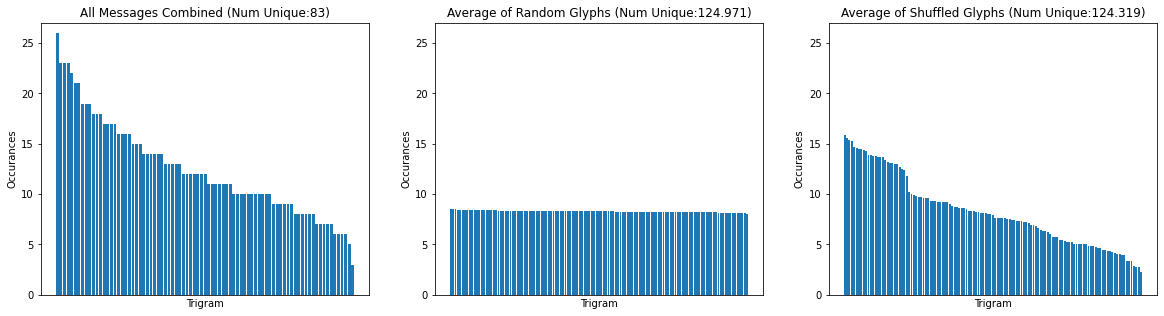

In [ ]:
# Combined Messages
data = combined_trigrams.most_common()
keys = [i[0] for i in data]
vals = [i[1] for i in data]
unique_data = len(data)

# Random Eyes
rand_eyes = Counter(all_random_eyes.trigrams).most_common()
rand_keys = [i[0] for i in rand_eyes]
rand_vals = [i[1]/NUM_RANDOM_SAMPLES for i in rand_eyes]

# Shuffles Eyes
shuffled_eyes = Counter(all_eyes_shuffled.trigrams).most_common()
shuf_keys = [i[0] for i in shuffled_eyes]
shuf_vals = [i[1]/NUM_RANDOM_SAMPLES for i in shuffled_eyes]

# Plotting
plt.figure(figsize=(20,5))
y_limit = max( data[0][1], rand_eyes[0][1]/NUM_RANDOM_SAMPLES, shuffled_eyes[0][1]/NUM_RANDOM_SAMPLES ) + 1


plt.subplot(1,3,1)
plt.bar(keys, vals)
plt.title("All Messages Combined (Num Unique:{})".format(unique_data))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

plt.subplot(1,3,2)
plt.bar(rand_keys, rand_vals)
plt.title("Average of Random Glyphs (Num Unique:{})".format(unique_trigrams_random))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

plt.subplot(1,3,3)
plt.bar(shuf_keys, shuf_vals)
plt.title("Average of Shuffled Glyphs (Num Unique:{})".format(unique_trigrams_shuffled))
plt.xlabel("Trigram")
plt.ylabel("Occurances")
plt.xticks([])
plt.ylim(top = y_limit)

if WRITE_REPORT:
    plt.savefig(os.path.join(output_dir,"trigram_distribution.png"))

plt.show()

'Rb%P^-k=8]Jfb^@.q(/n"=-Q!prH_q53 HSa:.5fOLPJ3P-O3Qh?%8#K[cAQI\\5:>%94g+jX$j3g$SIKphV_oq/0L?>,AY<-`KP'

## Bigram analysis
Here, I'll be looking at the bigrams within the trigrams of the message. More info on bigrams and what we can learn from analysing them [here](https://www.youtube.com/watch?v=uyH9-AHz-HY)

In [ ]:
all_messages

3108

In [ ]:
east1_bigrams = [east1_message.string[i:i+2] for i in range(len(east1_message.string) -1)]
Counter(east1_bigrams).most_common()

[('Rb', 1),
 ('b%', 1),
 ('%P', 1),
 ('P^', 1),
 ('^-', 1),
 ('-k', 1),
 ('k=', 1),
 ('=8', 1),
 ('8]', 1),
 (']J', 1),
 ('Jf', 1),
 ('fb', 1),
 ('b^', 1),
 ('^@', 1),
 ('@.', 1),
 ('.q', 1),
 ('q(', 1),
 ('(/', 1),
 ('/n', 1),
 ('n"', 1),
 ('"=', 1),
 ('=-', 1),
 ('-Q', 1),
 ('Q!', 1),
 ('!p', 1),
 ('pr', 1),
 ('rH', 1),
 ('H_', 1),
 ('_q', 1),
 ('q5', 1),
 ('53', 1),
 ('3 ', 1),
 (' H', 1),
 ('HS', 1),
 ('Sa', 1),
 ('a:', 1),
 (':.', 1),
 ('.5', 1),
 ('5f', 1),
 ('fO', 1),
 ('OL', 1),
 ('LP', 1),
 ('PJ', 1),
 ('J3', 1),
 ('3P', 1),
 ('P-', 1),
 ('-O', 1),
 ('O3', 1),
 ('3Q', 1),
 ('Qh', 1),
 ('h?', 1),
 ('?%', 1),
 ('%8', 1),
 ('8#', 1),
 ('#K', 1),
 ('K[', 1),
 ('[c', 1),
 ('cA', 1),
 ('AQ', 1),
 ('QI', 1),
 ('I\\', 1),
 ('\\5', 1),
 ('5:', 1),
 (':>', 1),
 ('>%', 1),
 ('%9', 1),
 ('94', 1),
 ('4g', 1),
 ('g+', 1),
 ('+j', 1),
 ('jX', 1),
 ('X$', 1),
 ('$j', 1),
 ('j3', 1),
 ('3g', 1),
 ('g$', 1),
 ('$S', 1),
 ('SI', 1),
 ('IK', 1),
 ('Kp', 1),
 ('ph', 1),
 ('hV', 1),
 ('V_', 1),
 (